# Data Vizualization Notebook

This notebook vizualizes the results of models when applied on the scraped NYT and Twitter Data

## Modules

In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from plots import create_timeseries_summary, create_initial_distribution, create_initial_summary

## Reading Data (Twitter)

## BERT

In [2]:
# Reading in the data
results_bert = pd.read_csv("data/twitter_bert_results.csv", index_col=0)

In [3]:
# Replacing 0 and 1s with label
results_bert[['Prediction']] = results_bert[['Prediction']].replace([0, 1], ["Negative", "Positive"])

In [4]:
# Normalizing the confidence (i.e. 0 is negative, 1 is positive)
results_bert["Confidence"] = results_bert.apply(lambda row: 1- row["Confidence"] if row["Prediction"] == "Negative" else row["Confidence"], axis=1)

In [5]:
# Dropping some companies
results_bert = results_bert[results_bert["Company"].isin(["AirCanada","Microsoft",  "Meta", "fia"]) ]

In [6]:
# Converting date to datetime
results_bert['Date'] = pd.to_datetime(results_bert['Date'])

In [7]:
# Renaming column
results_bert = results_bert.rename({"Company": "Twitter Handle"} ,axis=1)

In [8]:
results_bert

,Twitter Handle,Date,Prediction,Confidence
0,Microsoft,2023-03-15,Positive,0.891147
1,Microsoft,2023-03-15,Negative,0.088416
2,Microsoft,2023-03-14,Positive,0.758895
3,Microsoft,2023-03-14,Positive,0.740093
4,Microsoft,2023-03-14,Positive,0.884328
...,...,...,...,...
10160,fia,2023-03-07,Positive,0.704432
10161,fia,2023-03-07,Positive,0.704432
10162,fia,2023-03-07,Positive,0.732661
10163,fia,2023-03-07,Positive,0.704432


### LSTM

In [9]:
# Reading in the data
results_lstm = pd.read_csv("data/twitter_lstm_results_2.csv", index_col=0)

In [10]:
results_lstm = results_lstm.rename(columns={'twitter_handle': 'Company', 'predicted': 'Prediction', 'date': 'Date', 'confidence': 'Confidence' })

In [11]:
# Replacing 0 and 1s with label
results_lstm[['Prediction']] = results_lstm[['Prediction']].replace([0, 1], ["Negative", "Positive"])

In [12]:
# Dropping some companies
results_lstm = results_lstm[results_lstm["Company"].isin(["AirCanada","Microsoft",  "Meta", "fia"]) ]

In [13]:
# Converting date to datetime
results_lstm['Date'] = pd.to_datetime(results_lstm['Date'])

In [14]:
# Renaming column
results_lstm = results_lstm.rename({"Company": "Twitter Handle"} ,axis=1)

In [15]:
results_lstm  = results_lstm[["Twitter Handle", "Date", "Prediction", "Confidence"]]

In [16]:
results_lstm

,Twitter Handle,Date,Prediction,Confidence
527,Microsoft,2023-03-15,Negative,0.116699
528,Microsoft,2023-03-15,Negative,0.489080
529,Microsoft,2023-03-14,Positive,0.972837
530,Microsoft,2023-03-14,Negative,0.019932
531,Microsoft,2023-03-14,Positive,0.972387
...,...,...,...,...
42395,fia,2023-03-07,Positive,0.725971
42396,fia,2023-03-07,Positive,0.725971
42397,fia,2023-03-07,Positive,0.716815
42398,fia,2023-03-07,Positive,0.725971


In [17]:
# Putting the results onto a single dict
results = {"LSTM": results_lstm, "BERT": results_bert}

## Initial Summary

In [18]:
initial_summary_lstm = create_initial_summary(results["LSTM"])
initial_summary_bert = create_initial_summary(results["BERT"])

In [19]:
initial_summary_lstm

In [20]:
initial_summary_bert

In [21]:
dfi.export(initial_summary_lstm, 'results/lstm_initial_twitter_summary_result.png')

[0401/125924.303765:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[0401/125924.400694:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0401/125924.531640:INFO:headless_shell.cc(107)] 28189 bytes written to file /tmp/tmpq8j_vmxq/temp.png


In [22]:
dfi.export(initial_summary_bert, 'results/bert_initial_twitter_summary_result.png')

[0401/125924.685123:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0401/125924.699155:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[0401/125924.796720:INFO:headless_shell.cc(107)] 27611 bytes written to file /tmp/tmpa30zrso7/temp.png


## Initial Distribution

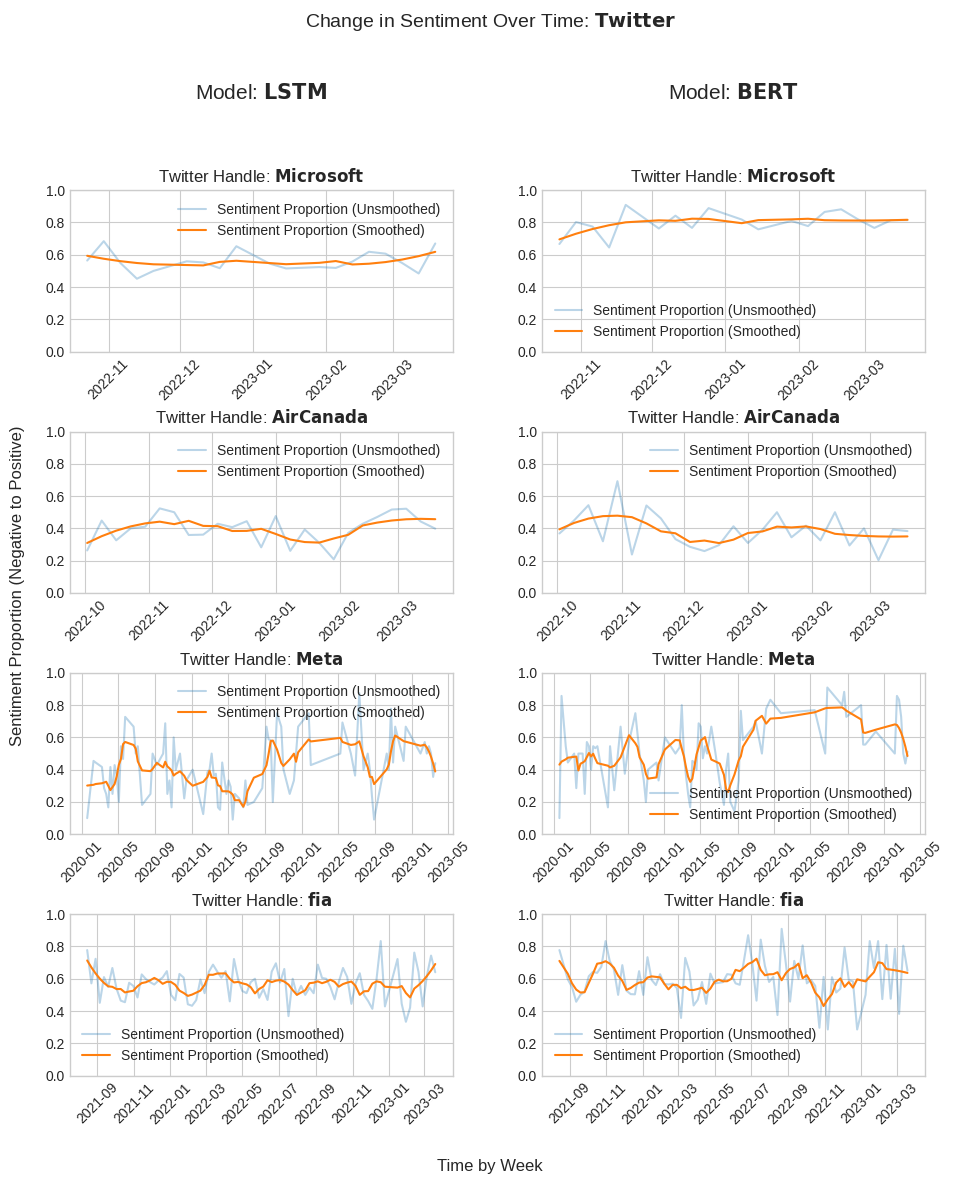

In [23]:
create_timeseries_summary(results)
plt.savefig("results/timeseries_distribution_grid.png")

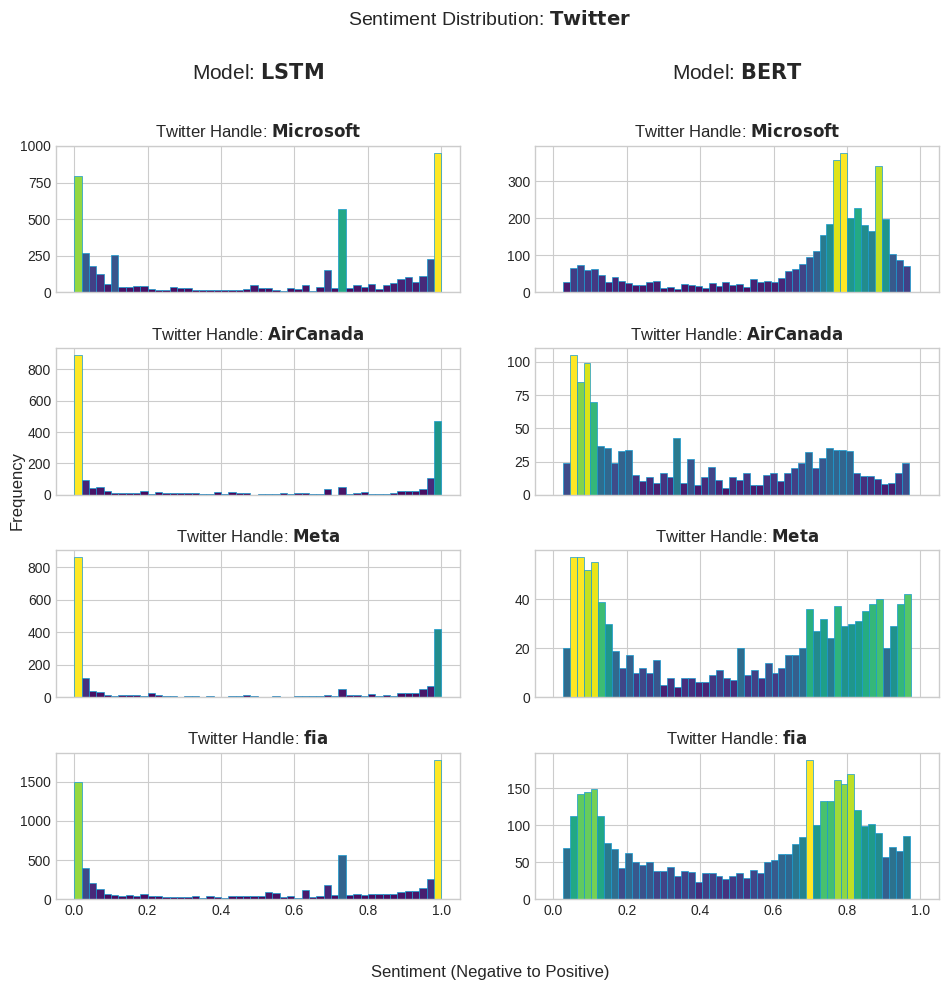

In [24]:
create_initial_distribution(results)
plt.savefig("results/distribution_grid.png")

## Reading Data (NYT)

## BERT

In [25]:
# Reading in the data
results_bert = pd.read_csv("data/nyt_bert_results.csv", index_col=0)

In [26]:
# Replacing 0 and 1s with label
results_bert[['Prediction']] = results_bert[['Prediction']].replace([0, 1], ["Negative", "Positive"])

In [27]:
# Normalizing the confidence (i.e. 0 is negative, 1 is positive)
results_bert["Confidence"] = results_bert.apply(lambda row: 1- row["Confidence"] if row["Prediction"] == "Negative" else row["Confidence"], axis=1)

In [28]:
# Dropping some companies
results_bert = results_bert[results_bert["Company"].isin(["air canada","microsoft",  "meta", "ftx"]) ]

In [29]:
# Converting date to datetime
results_bert['Date'] = pd.to_datetime(results_bert['Date'])

In [30]:
# Defining nicer looking companie labels
company_mapping = {
    "adani group":"Adani Group",
    "ftx":"FTX",
    "microsoft":"Microsoft",
    "google":"Google",
    "air canada":"Air Canada",
    "amazon":"Amazon",
    "apple ":"Apple ",
    "samsung":"Samsung",
    "meta":"Meta",
    "intel":"Intel",
    "bose":"Bose",
    "fia":"FIA"
}
    

In [31]:
results_bert["Company"] = results_bert.apply(lambda row: company_mapping[row["Company"]], axis=1)

In [32]:
results_bert

,Company,Date,Prediction,Confidence
46,FTX,2021-03-23,Positive,0.819054
47,FTX,2021-03-23,Positive,0.889018
48,FTX,2021-04-26,Positive,0.855208
49,FTX,2021-05-09,Positive,0.779544
50,FTX,2021-05-19,Positive,0.616161
...,...,...,...,...
8888,Meta,2023-03-15,Negative,0.151465
8889,Meta,2023-03-15,Negative,0.074556
8890,Meta,2023-03-15,Negative,0.074204
8891,Meta,2023-03-15,Negative,0.194756


### LSTM

In [33]:
# Reading in the data
results_lstm = pd.read_csv("data/nyt_lstm_results.csv", index_col=0)

In [34]:
results_lstm = results_lstm.rename(columns={'twitter_handle': 'Company', 'predicted': 'Prediction', 'date': 'Date', 'confidence': 'Confidence' })

In [35]:
# Replacing 0 and 1s with label
results_lstm[['Prediction']] = results_lstm[['Prediction']].replace([0, 1], ["Negative", "Positive"])

In [36]:
# Dropping some companies
results_lstm = results_lstm[results_lstm["Company"].isin(["AirCanada","Microsoft",  "Meta", "ftx"]) ]

In [37]:
# Converting date to datetime
results_lstm['Date'] = pd.to_datetime(results_lstm['Date'])

In [38]:
# Defining nicer looking companie labels
company_mapping = {
    "adani group":"Adani Group",
    "ftx":"FTX",
    "Microsoft":"Microsoft",
    "google":"Google",
    "AirCanada":"Air Canada",
    "amazon":"Amazon",
    "apple ":"Apple ",
    "samsung":"Samsung",
    "Meta":"Meta",
    "intel":"Intel",
    "bose":"Bose",
    "fia":"FIA"
}

results_lstm["Company"] = results_lstm.apply(lambda row: company_mapping[row["Company"]], axis=1)

In [39]:
results_lstm = results_lstm.drop(["source", "text"], axis=1)

In [40]:
results = {"LSTM": results_lstm, "BERT": results_bert}

## Initial Summary

In [41]:
initial_summary_lstm = create_initial_summary(results["LSTM"], index="Company")
initial_summary_bert = create_initial_summary(results["BERT"], index="Company")

In [42]:
initial_summary_lstm

In [43]:
initial_summary_bert

In [44]:
dfi.export(initial_summary_lstm, 'results/lstm_initial_nyt_summary_result.png')

[0401/125928.821169:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0401/125928.828639:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[0401/125928.926452:INFO:headless_shell.cc(107)] 26773 bytes written to file /tmp/tmpjvjkzwul/temp.png


In [45]:
dfi.export(initial_summary_bert, 'results/bert_initial_nyt_summary_result.png')

[0401/125929.075620:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0401/125929.079723:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
[0401/125929.177627:INFO:headless_shell.cc(107)] 26431 bytes written to file /tmp/tmpxyzusisx/temp.png


## Initial Distribution

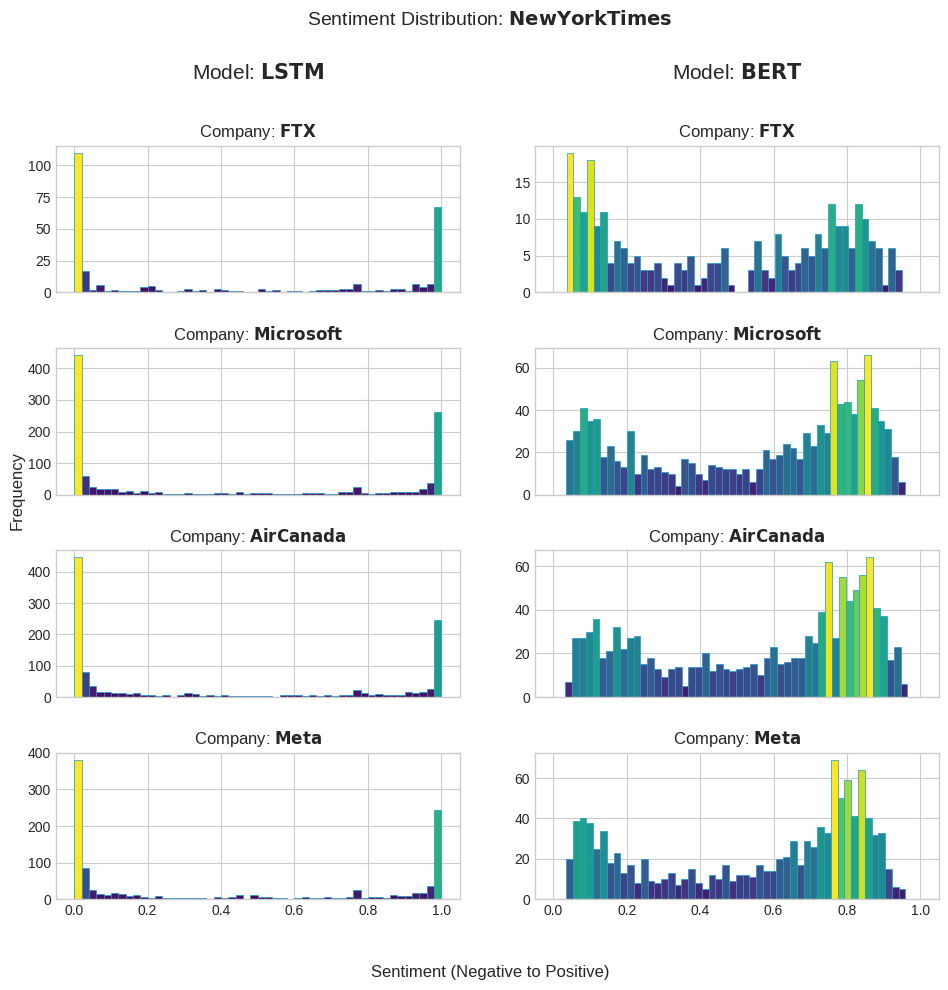

In [46]:
create_initial_distribution(results, index="Company", type="New York Times")
plt.savefig("results/nyt_distribution_grid.png")

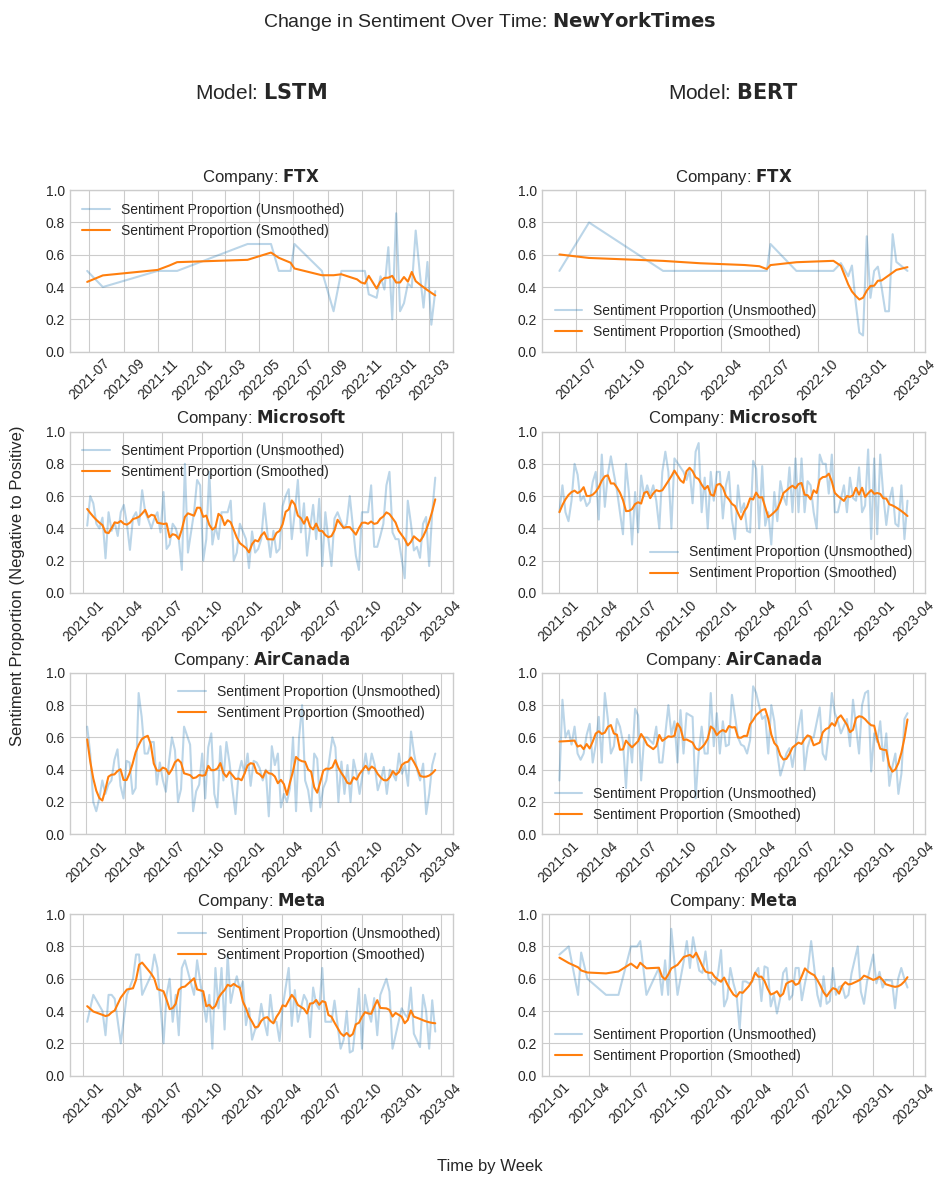

In [47]:
create_timeseries_summary(results, index="Company", type="New York Times")
plt.savefig("results/nyt_timeseries_distribution_grid.png")